In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta



# from DMS2_multiday_plots_utils import *
# from DMS2_fetch_protocol_data import fetch_latest_trials_data
from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df
import dj_utils as dju
from dir_utils import ANIMAL_TABLE_PATH
# settings
%load_ext autoreload
%autoreload 2
from plot_days_info import *

sns.set_context("talk")
# ratinfo = dj.create_virtual_module("intfo", "ratinfo")

# from DMS2_fetch_daily_summary_data import fetch_daily_summary_info
# !pip install openpyxl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TODO:
* trial results bar plot -> function (stacked or unstacked option)
* compose mega-figure

semi urgent extras:
* pre_go/can_viol daily plot

less urgent extras:
* update float dtypes to be pyarrow
* write an ax.utils function for x ticks, legend and title to allow for single line calls

In [160]:
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
few_days_ago = (datetime.today() - timedelta(days=4)).strftime("%Y-%m-%d")

In [161]:
trials_df = create_trials_df_from_dj(animal_ids=["R511"], date_min=few_days_ago)
dm = trials_df.date.max()
td1 = trials_df.query("date == @dm")
days_df = create_days_df_from_dj(animal_ids=["R511"], date_min=few_days_ago)

fetched 5 sessions for R511 between 2023-07-22 and 2023-07-26


## Trials Plot

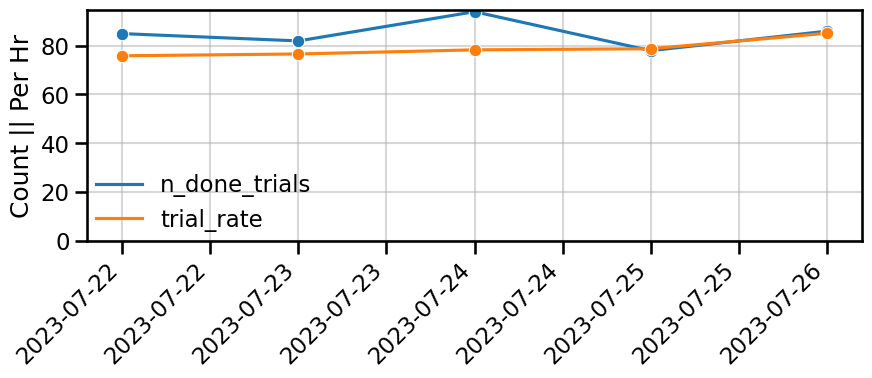

In [12]:
from plot_days_info import *

fig, ax = create_figure()

plot_trials(days_df, ax, legend=True)

## Stage plots

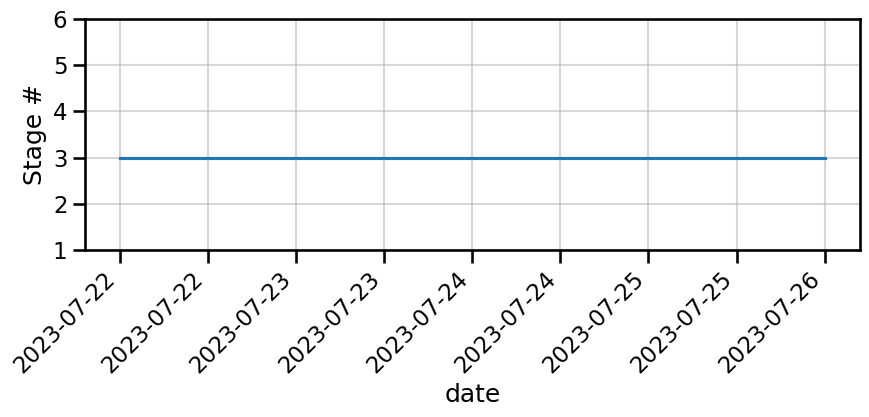

In [15]:
afig, ax = create_figure()
plot_stage(trials_df, ax, max_stage=7)

## Bias Plots

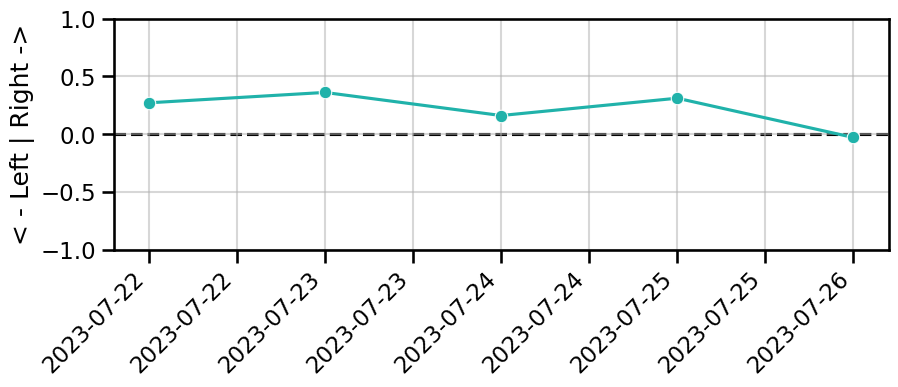

In [16]:
fig, ax = create_figure()
plot_side_bias(days_df, ax)

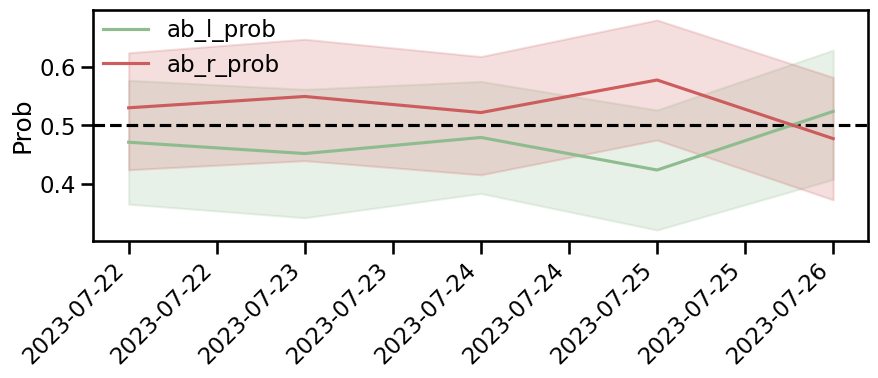

In [17]:
fig, ax = plt.subplots(figsize=(10, 3))

plot_antibias_probs(trials_df, ax)

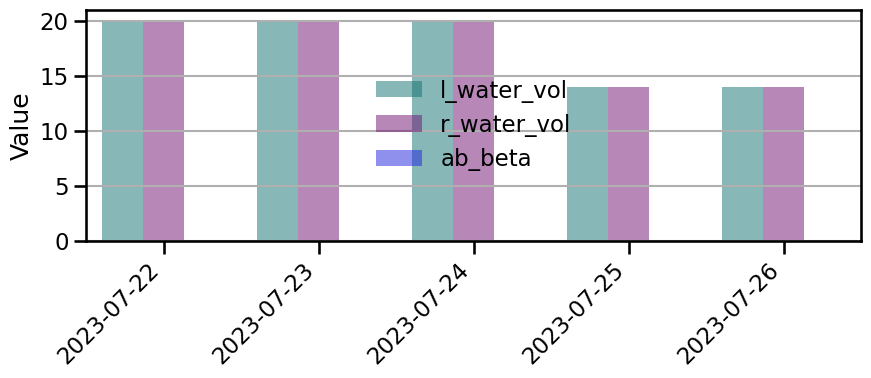

In [19]:
fig, ax = create_figure()

plot_sidebias_params(trials_df, ax, legend=True)

## Water & Mass plots

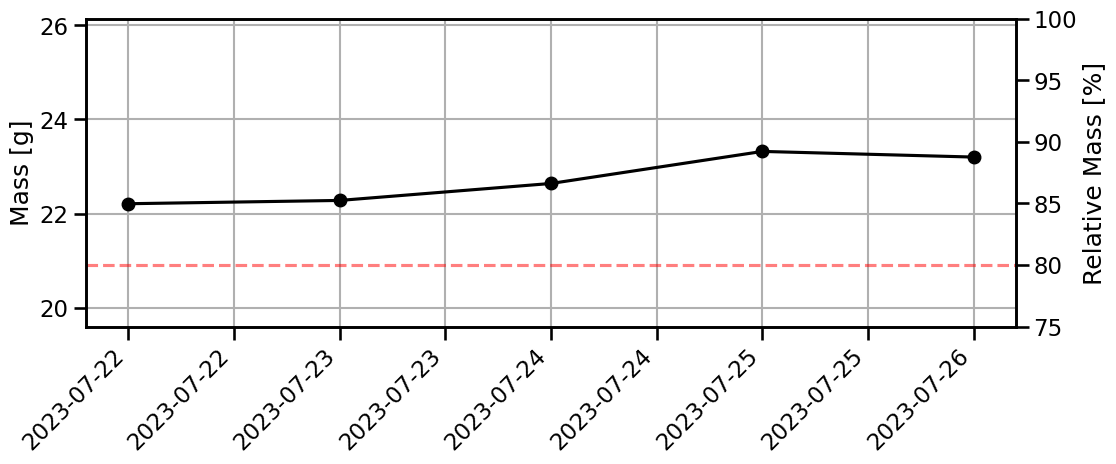

In [165]:
fig, ax = make_fig()
plot_mass(days_df, ax)

In [ ]:
# TODO stopper here- need to update code for mice (eventually for target bar, skip for now!)

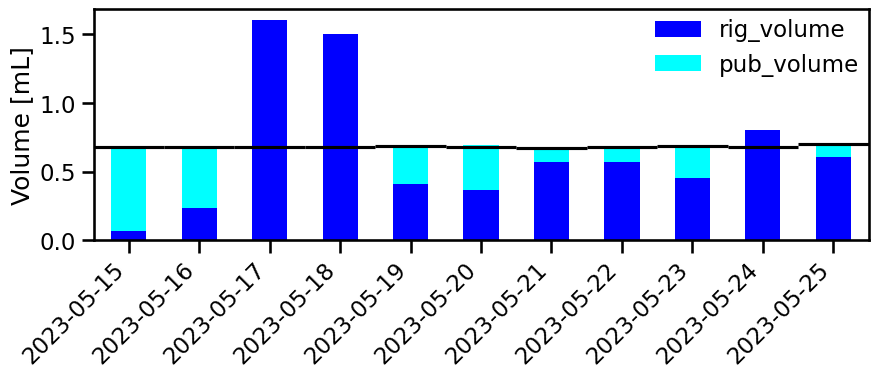

In [31]:
# test plot_multiday_water_restriction
fig,ax = create_figure()
plot_multiday_water_restriction(sum_r610, ax)

## Trial result plot

In [50]:
def plot_performance_bars(trial_df, ax, plot_type="counts",title="", legend=False, xaxis_label=True):
    if plot_type == "counts":
        perf_df = trial_df.groupby(["date"]).result.value_counts().unstack()
    elif plot_type == "rates":
        perf_df = trial_df.groupby(["date"]).result.value_counts(normalize=True).unstack()
    else:
        raise ValueError("plot type can only be 'counts' or 'rates'")
    
    perf_df.plot(kind='bar', stacked=True, ax=ax)
    
    set_date_x_ticks(ax, xaxis_label)
    set_legend(ax, legend)
    ax.set(title=title, xlabel="", ylabel=f"Perf {plot_type}")

    return None

    



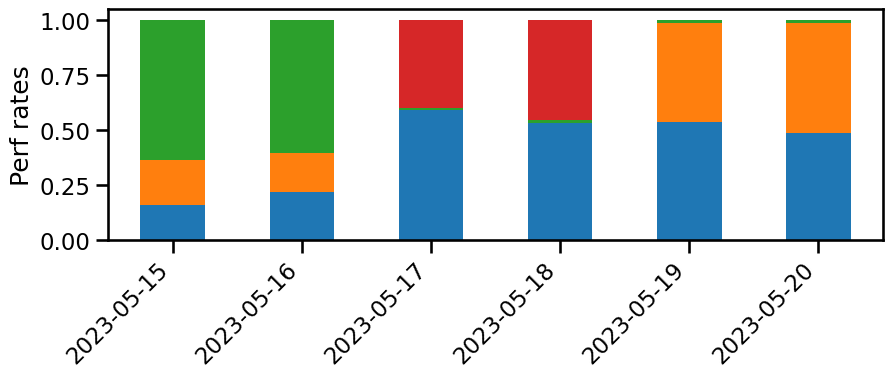

In [53]:
fig, ax = make_fig()

plot_performance_bars(r610, ax, plot_type="rates")


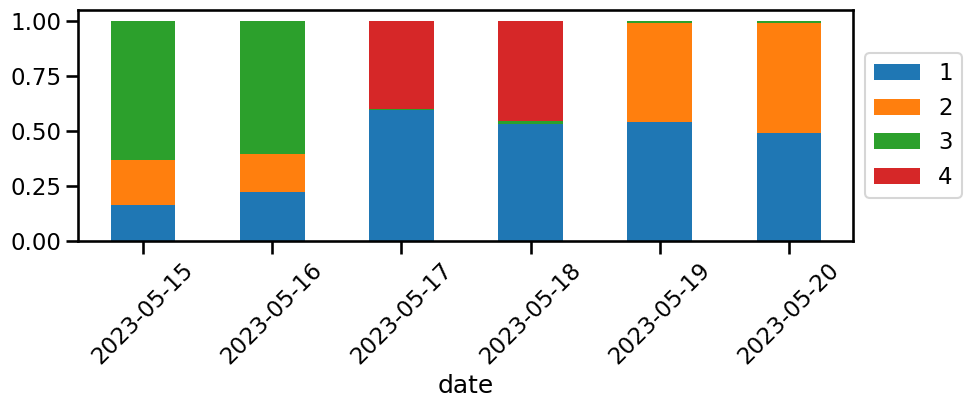

In [23]:
# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 3))
y = r610.groupby(["date"]).result.value_counts(normalize=True).unstack()
y.plot(kind='bar', stacked=True, ax=ax)

# Rotate x-axis labels
ax.tick_params(axis="x", labelrotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

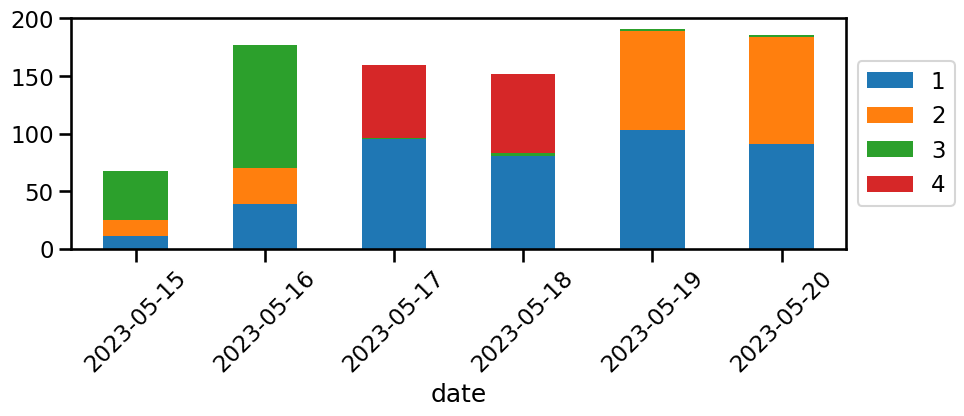

In [24]:
z = r610.groupby(["date"]).result.value_counts().unstack()
fig, ax = plt.subplots(figsize=(10, 3))
z.plot(kind='bar', stacked=True, ax=ax)

# Rotate x-axis labels
ax.tick_params(axis="x", labelrotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

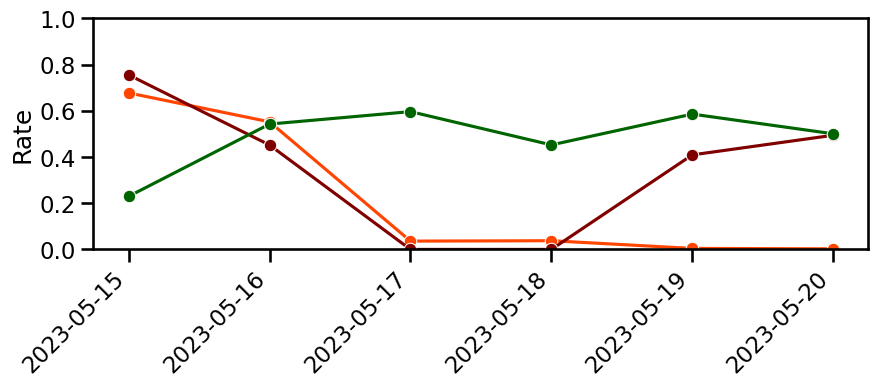

In [25]:
fig,ax = plt.subplots(figsize =(10,3))

plot_multiday_perfs(r610, ax)


## Timing Params

-pre_go, viol_dur, delay_dur (all on one plot?)
- cumulative delay_dur, colored by was_violation or was_noanswers

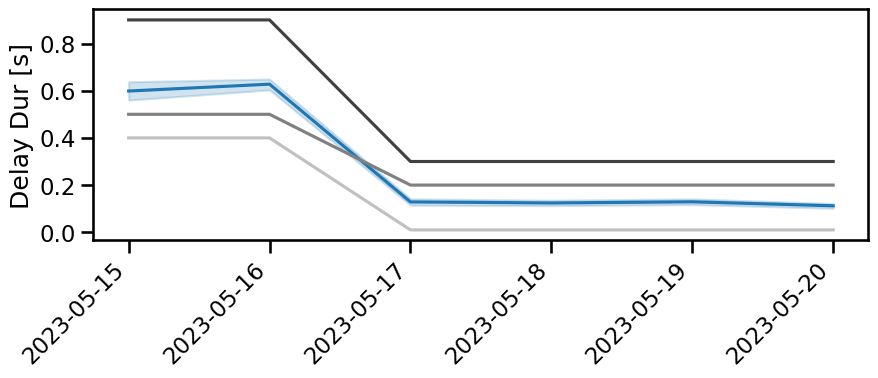

In [26]:
fig, ax = create_figure()

plot_multiday_delay_params(r610, ax)

## Rig & Tech

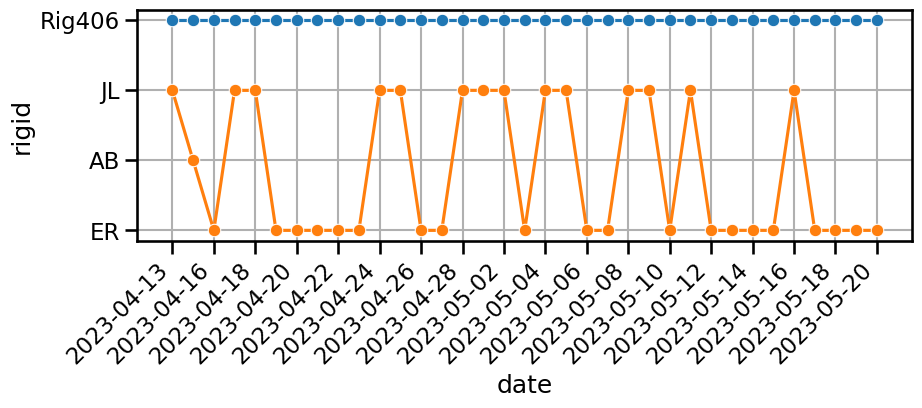

In [27]:
fig,ax = create_figure()
# TODO make this into a function

sns.lineplot(data=sum_r610, x="date", y="rigid", marker="o",ax=ax)
sns.lineplot(data=sum_r610, x="date", y="tech",marker="o",ax=ax)

ax.tick_params(axis="x", labelrotation=45)
set_date_x_ticks(ax, len(sum_r610.date))
ax.grid()


### Poking Info


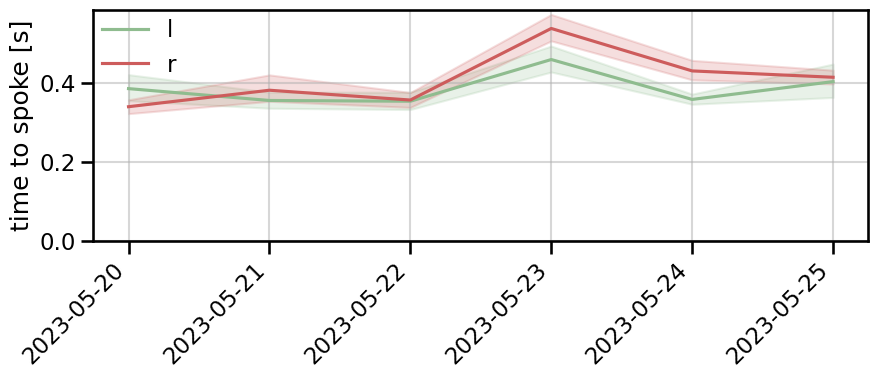

In [43]:
fig, ax= create_figure()
plot_multiday_time_to_spoke(r610, ax)

In [32]:
ax.get_xticklabels()

[Text(0, 0, '2023-05-15'),
 Text(1, 0, '2023-05-16'),
 Text(2, 0, '2023-05-17'),
 Text(3, 0, '2023-05-18'),
 Text(4, 0, '2023-05-19'),
 Text(5, 0, '2023-05-20'),
 Text(6, 0, '2023-05-21'),
 Text(7, 0, '2023-05-22'),
 Text(8, 0, '2023-05-23'),
 Text(9, 0, '2023-05-24'),
 Text(10, 0, '2023-05-25')]